# Proceso de comprensión y preparación de datos

## Recogida, comprensión y evaluación de calidad de datos
Un problema que se identificó a priori es que el tipo de dato de SDG en el test set es float, cuando debería ser int. Por otro lado, hay muchos caracteres especiales que deben ser tratados.

In [4]:
import pandas as pd
import re
from sklearn.svm import SVC
import chardet
from num2words import num2words
import spacy
pd.set_option('display.max_rows', None)

# Mostrar todo el contenido de las celdas, sin truncar
pd.set_option('display.max_colwidth', None)

file1 = 'ODScat_345.csv' 
file2 = 'TestODScat_345.csv'  

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Functions
def find_uncommon_and_non_text_chars(dataframe, column_name):
    uncommon_chars_info = {}
    for text in dataframe[column_name]:
        # Find all characters that are not common in normal text (non-ASCII, non-alphabetic, non-numeric)
        uncommon_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
        for char in uncommon_chars:
            if char not in uncommon_chars_info:
                # Gather information about each uncommon character
                utf8_encoded = char.encode('utf-8')
                char_info = {
                    'character': char,
                    'hexadecimal': ' '.join(f'{byte:02x}' for byte in utf8_encoded),
                    'unicode_name': f'{char} (U+{ord(char):04X})',
                    'utf8_bytes': [byte for byte in utf8_encoded]
                }
                uncommon_chars_info[char] = char_info
    return uncommon_chars_info

# Understanding
print("First few rows of training set:")
display(df1.head())

print("First few rows of test set:")
display(df2.head())

print("\nShape of training set:", df1.shape)

print("Shape of validation set:", df2.shape)

print("\nInfo for training set:")
df1.info()
print("\nInfo for validation set:")
df2.info()

print("\nDescriptive statistics for training set:")
display(df1.describe(include='all')) 

print("\nDescriptive statistics for validation set:")
display(df2.describe(include='all'))

print("\nBasic statistics for natural_text length in training set:")
display(df1['Textos_espanol'].str.len().describe())

print("\nBasic statistics for natural_text length in validation set:")
display(df2['Textos_espanol'].str.len().describe())

print("Distribution of SDG categories in training set:")
distribution_file1 = df1['sdg'].value_counts()
display(distribution_file1)

print("\nDistribution of SDG categories in test set:")
distribution_file2 = df2['sdg'].value_counts()
display(distribution_file2)

print("\nUnusual characters in training set:")
unusual_chars_file1 = find_uncommon_and_non_text_chars(df1, 'Textos_espanol')
display(unusual_chars_file1)

print("\nUnusual characters in validation set:")
unusual_chars_file2 = find_uncommon_and_non_text_chars(df2, 'Textos_espanol')
display(unusual_chars_file2)

# Consistency
print("\nColumn names in training set:", df1.columns.tolist())
print("Column names in test:", df2.columns.tolist())

print("\nData types in training set:")
display(df1.dtypes)

print("Data types in test set:")
display(df2.dtypes)

# Uniqueness
print("Checking for duplicated rows within each file...\n")

duplicates_file1 = df1[df1.duplicated()]
print(f"Number of duplicated rows in training set: {len(duplicates_file1)}")
display(duplicates_file1)

duplicates_file2 = df2[df2.duplicated()]
print(f"Number of duplicated rows in test set: {len(duplicates_file2)}")
display(duplicates_file2)

print("\nChecking for common rows between file1 and file2...")

common_rows = pd.merge(df1, df2, how='inner')
print(f"Number of common rows between file1 and file2: {len(common_rows)}")
display(common_rows)

if len(common_rows) > 0:
    print("\nCommon rows found in both files:")
    display(common_rows)
else:
    print("\nNo common rows found in both files.")

# Missing values
print("\nMissing values in training set:")
display(df1.isnull().sum())

print("Missing values in validation set:")
display(df2.isnull().sum())

# Validity
print("\nUnique labels in test set:")
display(df1['sdg'].unique())

print("Unique labels in validation set:")
display(df2['sdg'].unique())


First few rows of training set:


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

First few rows of test set:


,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",NaN
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 20


Shape of training set: (4049, 2)
Shape of validation set: (702, 2)

Info for training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB

Info for validation set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB

Descriptive statistics for training set:


,Textos_espanol,sdg
count,4049,4049.000000
unique,4049,NaN
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",NaN
freq,1,NaN
mean,NaN,4.051124
std,NaN,0.814338
min,NaN,3.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



Descriptive statistics for validation set:


,Textos_espanol,sdg
count,702,0.0
unique,702,NaN
top,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN



Basic statistics for natural_text length in training set:


count    4049.000000
mean      699.632502
std       228.988965
min       294.000000
25%       531.000000
50%       657.000000
75%       827.000000
max      1513.000000
Name: Textos_espanol, dtype: float64


Basic statistics for natural_text length in validation set:


count     702.000000
mean      693.564103
std       219.593226
min       338.000000
25%       515.250000
50%       665.500000
75%       836.500000
max      1468.000000
Name: Textos_espanol, dtype: float64

Distribution of SDG categories in training set:


sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Distribution of SDG categories in test set:


Series([], Name: count, dtype: int64)


Unusual characters in training set:


{',': {'character': ',',
  'hexadecimal': '2c',
  'unicode_name': ', (U+002C)',
  'utf8_bytes': [44]},
 'Ã': {'character': 'Ã',
  'hexadecimal': 'c3 83',
  'unicode_name': 'Ã (U+00C3)',
  'utf8_bytes': [195, 131]},
 'º': {'character': 'º',
  'hexadecimal': 'c2 ba',
  'unicode_name': 'º (U+00BA)',
  'utf8_bytes': [194, 186]},
 '³': {'character': '³',
  'hexadecimal': 'c2 b3',
  'unicode_name': '³ (U+00B3)',
  'utf8_bytes': [194, 179]},
 '.': {'character': '.',
  'hexadecimal': '2e',
  'unicode_name': '. (U+002E)',
  'utf8_bytes': [46]},
 '(': {'character': '(',
  'hexadecimal': '28',
  'unicode_name': '( (U+0028)',
  'utf8_bytes': [40]},
 ')': {'character': ')',
  'hexadecimal': '29',
  'unicode_name': ') (U+0029)',
  'utf8_bytes': [41]},
 '©': {'character': '©',
  'hexadecimal': 'c2 a9',
  'unicode_name': '© (U+00A9)',
  'utf8_bytes': [194, 169]},
 '%': {'character': '%',
  'hexadecimal': '25',
  'unicode_name': '% (U+0025)',
  'utf8_bytes': [37]},
 '¡': {'character': '¡',
  'hexadecim


Unusual characters in validation set:


{'Ã': {'character': 'Ã',
  'hexadecimal': 'c3 83',
  'unicode_name': 'Ã (U+00C3)',
  'utf8_bytes': [195, 131]},
 '³': {'character': '³',
  'hexadecimal': 'c2 b3',
  'unicode_name': '³ (U+00B3)',
  'utf8_bytes': [194, 179]},
 ',': {'character': ',',
  'hexadecimal': '2c',
  'unicode_name': ', (U+002C)',
  'utf8_bytes': [44]},
 '.': {'character': '.',
  'hexadecimal': '2e',
  'unicode_name': '. (U+002E)',
  'utf8_bytes': [46]},
 'º': {'character': 'º',
  'hexadecimal': 'c2 ba',
  'unicode_name': 'º (U+00BA)',
  'utf8_bytes': [194, 186]},
 '©': {'character': '©',
  'hexadecimal': 'c2 a9',
  'unicode_name': '© (U+00A9)',
  'utf8_bytes': [194, 169]},
 'ó': {'character': 'ó',
  'hexadecimal': 'c3 b3',
  'unicode_name': 'ó (U+00F3)',
  'utf8_bytes': [195, 179]},
 'é': {'character': 'é',
  'hexadecimal': 'c3 a9',
  'unicode_name': 'é (U+00E9)',
  'utf8_bytes': [195, 169]},
 '-': {'character': '-',
  'hexadecimal': '2d',
  'unicode_name': '- (U+002D)',
  'utf8_bytes': [45]},
 'á': {'character':


Column names in training set: ['Textos_espanol', 'sdg']
Column names in test: ['Textos_espanol', 'sdg']

Data types in training set:


Textos_espanol    object
sdg                int64
dtype: object

Data types in test set:


Textos_espanol     object
sdg               float64
dtype: object

Checking for duplicated rows within each file...

Number of duplicated rows in training set: 0


,Textos_espanol,sdg


Number of duplicated rows in test set: 0


,Textos_espanol,sdg



Checking for common rows between file1 and file2...
Number of common rows between file1 and file2: 0


,Textos_espanol,sdg



No common rows found in both files.

Missing values in training set:


Textos_espanol    0
sdg               0
dtype: int64

Missing values in validation set:


Textos_espanol      0
sdg               702
dtype: int64


Unique labels in test set:


array([3, 4, 5])

Unique labels in validation set:


array([nan])

## Tranformación de datos

### Limpieza inicial del texto
Al final quedan los tokens almacenados en el DF.

In [6]:
import unicodedata
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

def find_sequences_of_uncommon_chars_bytes_detailed(dataframe, column_name, uncommon_chars_set):
    """
    Function to find all sequences of uncommon characters from a set in a dataframe column,
    show them in terms of their byte representation, separate characters, and how they are printed together.
    The function processes the text linearly, collecting sequences of uncommon characters.
    """
    sequences_by_length = {}
    for text in dataframe[column_name]:
        current_sequence = []
        for char in text:
            if char in uncommon_chars_set:
                current_sequence.append(char)
            else:
                if current_sequence:
                    # Convert current sequence list to string
                    sequence_str = ''.join(current_sequence)
                    # Convert each character to its byte representation and store as a tuple
                    sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
                    # Separate the characters in a tuple
                    separated_chars = tuple(sequence_str)
                    # Determine how the sequence is printed together on the screen
                    screen_display = ''.join(sequence_str)
                    # Determine the length of the sequence
                    length = len(sequence_str)
                    # Initialize set for this length if not already present
                    if length not in sequences_by_length:
                        sequences_by_length[length] = set()
                    # Add the sequence with its byte representation, separated characters, and screen display
                    sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
                    # Reset current sequence
                    current_sequence = []
        # Check if there's any remaining sequence at the end of the text
        if current_sequence:
            sequence_str = ''.join(current_sequence)
            sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
            separated_chars = tuple(sequence_str)
            screen_display = ''.join(sequence_str)
            length = len(sequence_str)
            if length not in sequences_by_length:
                sequences_by_length[length] = set()
            sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
    return sequences_by_length

def fix_double_encoded_utf8(text):
    try:
        # First, encode the string to bytes, treating it as if it's in 'latin-1' encoding.
        bytes_data = text.encode('latin-1')
        # Then, decode those bytes using 'utf-8'.
        fixed_text = bytes_data.decode('utf-8')
        # If decoding succeeds, return the fixed text.
        return fixed_text
    except Exception:
        # If there is a Unicode error, it means the text wasn't double-encoded, return the original text.
        return text
    

def replace_screen_display_with_fixed_utf8_from_sequences(dataframe, column_name, sequences_by_length):
    """
    Function to replace each screen_display in the DataFrame column with the output of 
    fix_double_encoded_utf8(screen_display), using the sequences already found by 
    find_sequences_of_uncommon_chars_bytes_detailed.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the text column.
    column_name (str): The name of the column with text data to modify.
    sequences_by_length (dict): The dictionary of sequences from find_sequences_of_uncommon_chars_bytes_detailed.
    
    Returns:
    pd.DataFrame: The dataframe with the specified column modified.
    """
    for length, sequences in sequences_by_length.items():
        for sequence in sequences:
            sequence_bytes, separated_chars, screen_display = sequence
            # Fix the screen_display using the provided function
            fixed_display = fix_double_encoded_utf8(screen_display)
            # Replace occurrences of the old screen_display with the fixed version in the DataFrame
            dataframe[column_name] = dataframe[column_name].str.replace(screen_display, fixed_display, regex=False)
    
    return dataframe

def clean_text(text):
    text = text.lower() # Pasa a minúsculas
    text = re.sub(r'[^\w\s]', '', text) # Elimina símbolos que no aportan información
    text = re.sub(r'\d+', '', text)  # Elimina números, se considera que no aportan información
    text = unicodedata.normalize('NFKD', text) # Convierte caracteres en su forma normal/estándar
    text = ''.join([c for c in text if not unicodedata.combining(c)]) # Elimina acentos
    word_tokens = word_tokenize(text) # Se obtienen los tokens
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words] # Se eliminan Stopwords
    stems = [stemmer.stem(word) for word in filtered_words] # Se obtienen los stems de cada palabra
    return ' '.join(stems)


def normalize_df_text_column(df, column_name):
    uncommon_and_non_text_chars_info = find_uncommon_and_non_text_chars(df, column_name) # Obtiene caracteres raros pero que potencialmente aportan información
    sequences_of_uncommon_chars_bytes_detailed = find_sequences_of_uncommon_chars_bytes_detailed(df, column_name, uncommon_and_non_text_chars_info) # Obtiene todas las secuencias de caracteres anteriormente obtenidos
    df = replace_screen_display_with_fixed_utf8_from_sequences(df, column_name, sequences_of_uncommon_chars_bytes_detailed) # Arregla secuencias mal codificadas y que tienen una interpretación válida
    df[column_name] = df[column_name].apply(clean_text) # Limpia el texto
    return df


df1 = normalize_df_text_column(df1, 'Textos_espanol')
df2 = normalize_df_text_column(df2, 'Textos_espanol')
df2['sdg'] = 0

df1.sample(10)

[nltk_data] Downloading package stopwords to /home/socub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/socub/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/socub/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Textos_espanol,sdg
3400,tambi pequen diferent negat probabil emple actual embarg diferent deb contrast diferent posit proporcion vid laboral pas emple remuner estim punt porcentual cas hombr punt porcentual cas mujer general dat dispon distint nivel cin indic formacion profesional obtien tan buen result educ academ respect ingres obtien result liger mejor educ academ cuent med empleabil,4
788,tal enfoqu represent buen practic formul presupuest mism tiemp embarg exist percepcion lad salud decision real asign todavi estan determin gran med factor men tangibl relacion interpersonal evalu subjet lug objet plan negoci si cas sol pued conduc aument subvencion condicional salud,3
2798,aline investig maldon najer segovi mexic mostr aument signific ingres mujer pued amenaz estatus hombr hac espos punt vist gener mas tradicional reafirm control trav violenci general embarg riesg aument vpi tambi podri disminu tiemp actitud individual hombr actitud social mas ampli acept mas mayor activ econom autonomi financ mujer ahmed ejempl particip intervencion imag sudafr inform mayor confianz si mism apoy social habil comun obten form part inici combin microfinanci capacit dieron result mejor comun soci evit cualqui conflict conviert violenci kim et,5
1979,si bien cuent estudi reci lleg part result pis indic adem igual mayori pais ocde estudi inmigr primer gener sueci mas desfavorec academ estudi orig inmigr estudi inmigr segund gener estudi nac pais realiz prueb pis dos padr nac extranjer estudi nac extranjer regres estudi nac pais realiz prueb pis men padr naci dich pais,4
1049,capitul destac buen practic region internacional conclu recomend hac colabor divulg mas efect mensaj principal capitul si bien institu educ superior suel particip activ part interes local imag divers proyect program fragment podri logr mas trav enfoqu integral desarroll nivel regional bas evident mas sol coordin esfuerz especif abord desafi clav region,4
2497,men nin ven oblig contr matrimoni precoz mas mujer ocup puest parlamentari liderazg estan reform ley promov iguald gener pes avanc ley norm social discriminatori sig siend generaliz junt practic nociv form violenci mujer nin mujer sig insuficient represent nivel liderazg polit,5
559,segund lug tambi refier atencion continu deb prest nivel sistem sanitari hog centr salud comunitari hospital aument rapid acces asistent cualific part necesari atencion obstetr urgenci oportun reconoc prestacion servici madr reci nac centr sistem sanitari sol consiguient reduccion mortal matern neonatal med exit sistem sanitari planif famili element fundamental mejor salud matern infantil,3
2276,pais institu social discrimin mujer norm gener aplic fuerz consecuent aquell pais sigi alto hombr mujer ven oblig comport segun esper institu social dat pib per capit ppa gast public poblacion pais orig destin tom penn world tabl,5
3198,compar tip estadist dedic poc manual recurs formacion desarroll estadist gener division estadist nacion unid lider avanc tecnic camp estadist gener principal period comprend cuart conferent mundial muj nacion unid consej econom social division lider produccion material tecnic compil estadist mujer hombr,5
863,dentr sistem salud exist dos model diferent evalu construct funcionamientodiscapac enfoqu activ vid diari avd model katzbarthel enfoqu funcion icf desarroll oms icf desarroll proporcion marc mas integral bas vision condicion salud enfermed interaccion funcion estructur corporal activ particip vez ven afect factor social ambiental tambi destac import particip result oms,3


### Vectorización del texto

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data from df1
X_tfidf_1 = tfidf_vectorizer.fit_transform(df1['Textos_espanol'])

# Transform the text data from df2 using the fitted vectorizer
X_tfidf_2 = tfidf_vectorizer.transform(df2['Textos_espanol'])

# Convert the sparse matrix results to dense format and create DataFrames
tfidf_df_1 = pd.DataFrame(X_tfidf_1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2 = pd.DataFrame(X_tfidf_2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show a sample of 10 random rows from the TF-IDF DataFrame to understand the distribution
print("Sample of TF-IDF Vectorization for training set:")
display(tfidf_df_1.sample(10))

# Optionally, display the shape of the DataFrames to understand the dimensionality
print("\nShape of TF-IDF Matrix for training set:", tfidf_df_1.shape)
print("Shape of TF-IDF Matrix for test set:", tfidf_df_2.shape)

# Display statistics like mean, max, and min to understand the TF-IDF score distribution
print("\nTF-IDF Statistics for training set:")
print(tfidf_df_1.describe())

# Print out the feature names (words) in the vocabulary to understand what terms are being analyzed
# print("\nTF-IDF Feature Names (Vocabulary):")
# for col in tfidf_df_1.columns:
#     print(col)



Sample of TF-IDF Vectorization for training set:


,_par,aalt,aalton,aarkrog,aarrev,abaj,aban,abander,abandon,abarc,...,zogl,zoles,zoll,zomb,zon,zonmw,zuck,zukowski,zupanc,zusatzentgelt
1827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Shape of TF-IDF Matrix for training set: (4049, 10189)
Shape of TF-IDF Matrix for test set: (702, 10189)

TF-IDF Statistics for training set:
              _par         aalt       aalton      aarkrog       aarrev  \
count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000   
mean      0.000040     0.000034     0.000065     0.000067     0.000034   
std       0.002515     0.002160     0.004129     0.004283     0.002160   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.160032     0.137441     0.262704     0.272559     0.137441   

              abaj         aban      abander      abandon        abarc  ...  \
count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000  ...   
mean      0.000661     0.000250 

# Modelo y evaluación

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def calcular_metricas(y, y_pred):
    # Macro
    precision_macro = precision_score(y, y_pred, average='macro')
    recall_macro = recall_score(y, y_pred, average='macro')
    f1_macro = f1_score(y, y_pred, average='macro')
    print(f'Precisión macro: {precision_macro}')
    print(f'Recall macro: {recall_macro}')
    print(f'F1 Score macro: {f1_macro}')

    # Micro
    precision_micro = precision_score(y, y_pred, average='micro')
    recall_micro = recall_score(y, y_pred, average='micro')
    f1_micro = f1_score(y, y_pred, average='micro')
    print(f'Precisión micro: {precision_micro}')
    print(f'Recall micro: {recall_micro}')
    print(f'F1 Score micro: {f1_micro}')

    # Weighted
    precision_weighted = precision_score(y, y_pred, average='weighted')
    recall_weighted = recall_score(y, y_pred, average='weighted')
    f1_weighted = f1_score(y, y_pred, average='weighted')
    print(f'Precisión weighted: {precision_weighted}')
    print(f'Recall weighted: {recall_weighted}')
    print(f'F1 Score weighted: {f1_weighted}')


def graficar_matrices_confusion(y, y_pred):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos
    
    # Primera gráfica: Confusion matrix básica
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(ax=axes[0], cmap="viridis")
    axes[0].set_title("Confusion matrix")

    # Segunda gráfica: Confusion matrix normalizada
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
    axes[1].set_title("CM normalized by row")

    # Tercera gráfica: Confusion matrix con los errores resaltados
    sample_weight = (y_pred != y)
    ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
    axes[2].set_title("Errors highlighted")

    # Mostrar todas las gráficas
    plt.tight_layout()
    plt.show()


## Modelo 1 RandomForest (Sebastián Ospino)

### Construcción modelo

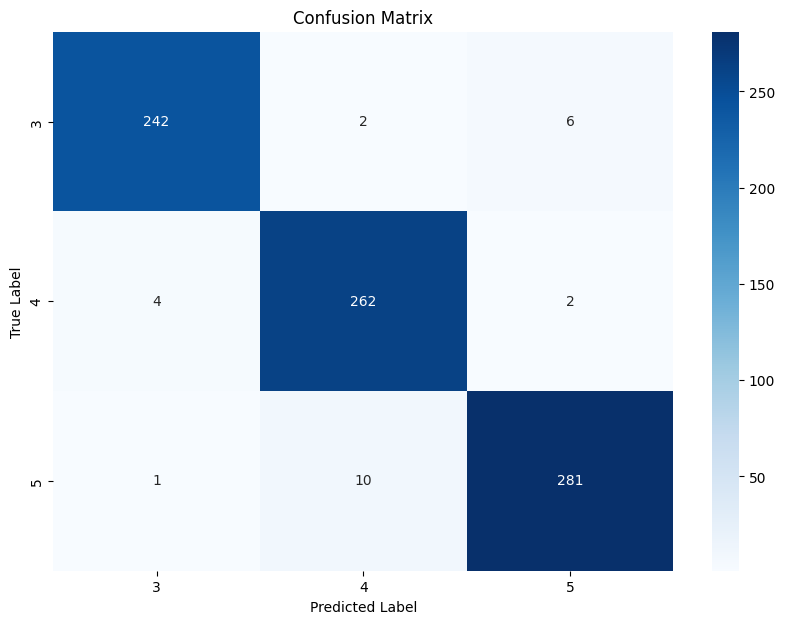

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting df1 into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df_1, df1['sdg'], test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Evaluación modelo

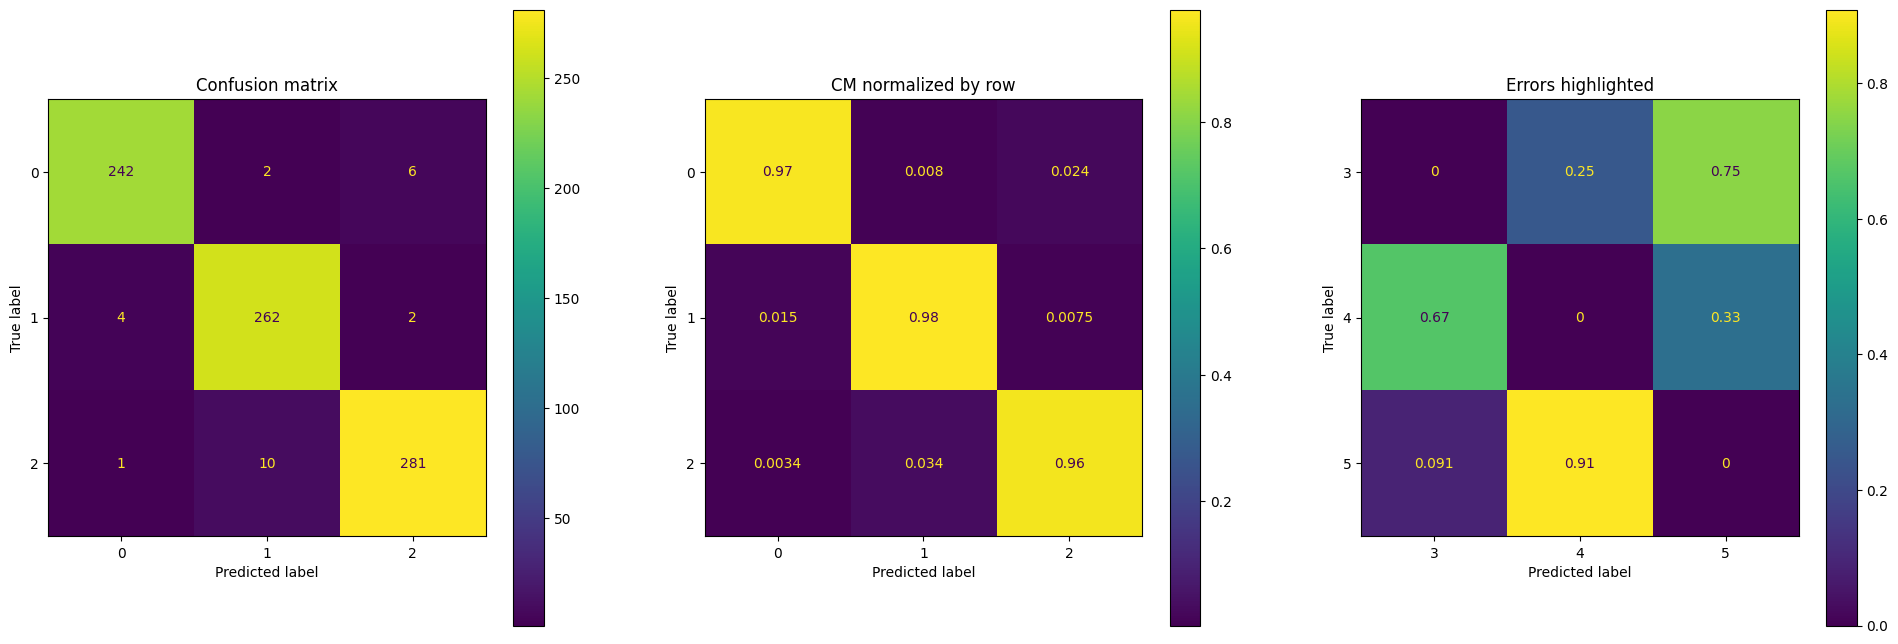

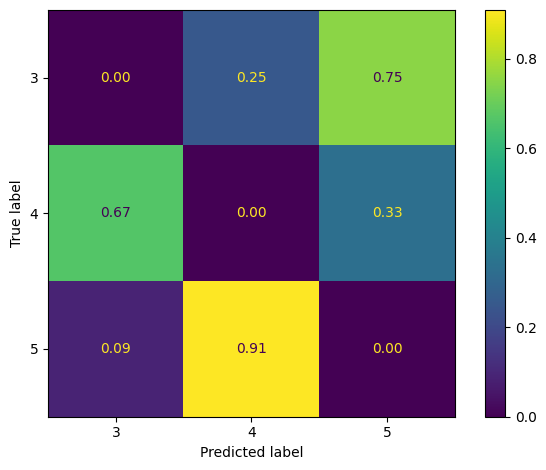

In [14]:

from sklearn.metrics import ConfusionMatrixDisplay

graficar_matrices_confusion(y_test, y_pred)

In [15]:
calcular_metricas(y_test, y_pred)

Precisión macro: 0.9694266012275442
Recall macro: 0.9693135691405983
F1 Score macro: 0.9693101629084216
Precisión micro: 0.9691358024691358
Recall micro: 0.9691358024691358
F1 Score micro: 0.9691358024691358
Precisión weighted: 0.9692827160431969
Recall weighted: 0.9691358024691358
F1 Score weighted: 0.969149805219201


In [16]:


# Print the classification report to evaluate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       250
           4       0.96      0.98      0.97       268
           5       0.97      0.96      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



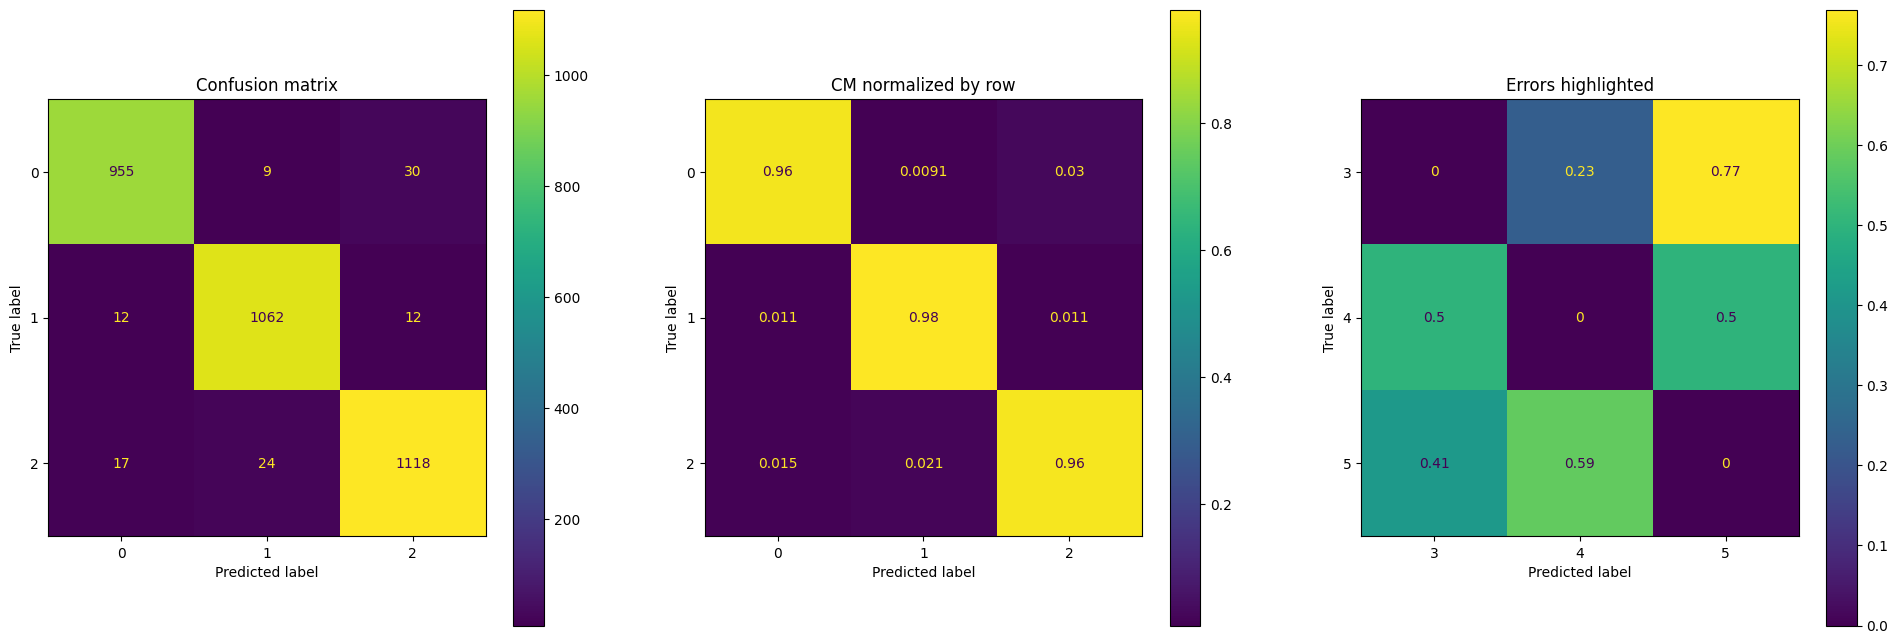

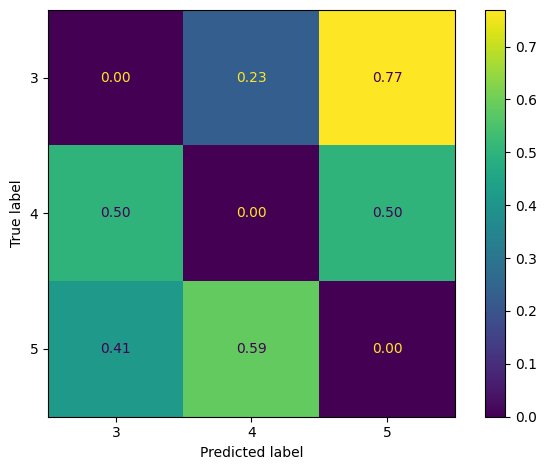

In [17]:
from sklearn.calibration import cross_val_predict


y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5) # 5-fold cross-validation

graficar_matrices_confusion(y_train, y_train_pred)


In [18]:
calcular_metricas(y_train, y_train_pred)


Precisión macro: 0.9680615241438195
Recall macro: 0.9677632721521835
F1 Score macro: 0.9678985834478686
Precisión micro: 0.9678913244828651
Recall micro: 0.9678913244828651
F1 Score micro: 0.9678913244828651
Precisión weighted: 0.9678952529565018
Recall weighted: 0.9678913244828651
F1 Score weighted: 0.9678800899809706


In [19]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.97      0.96      0.97       994
           4       0.97      0.98      0.97      1086
           5       0.96      0.96      0.96      1159

    accuracy                           0.97      3239
   macro avg       0.97      0.97      0.97      3239
weighted avg       0.97      0.97      0.97      3239



### Análisis de las palabras identificadas:

Top 20 most important words globally:
         feature  importance
6383       mujer    0.064439
3134        educ    0.034187
8492       salud    0.029879
4167       gener    0.029681
3504      escuel    0.024109
762     atencion    0.017006
3612      estudi    0.016727
608   aprendizaj    0.014413
4576       hombr    0.014131
6958     pacient    0.013995
8524    sanitari    0.011488
407        alumn    0.010976
6075       medic    0.010554
2981      docent    0.010170
4730      iguald    0.008997
3372       ensen    0.008296
3342  enfermedad    0.007952
3493     escolar    0.006603
3492       escol    0.006350
9576  tratamient    0.006132


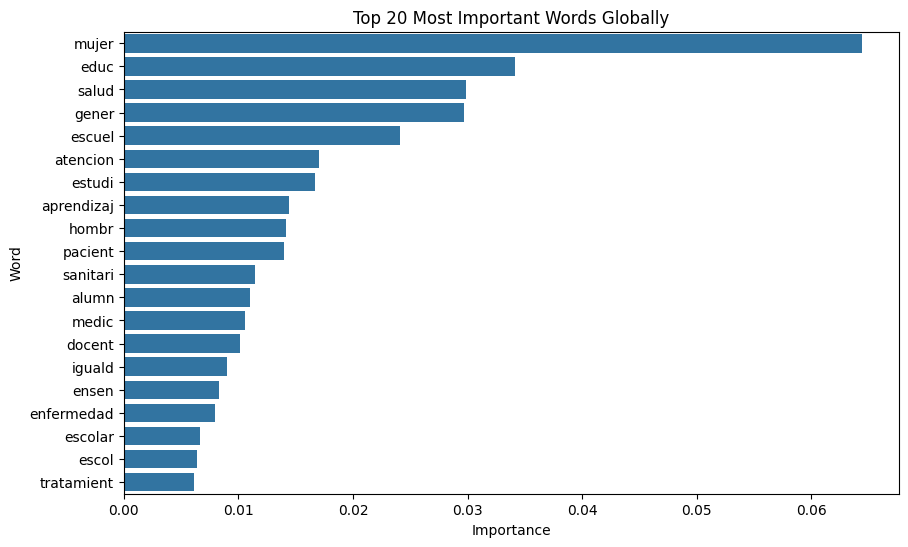

In [14]:
# Get feature importances globally (across all labels)
global_importances = clf.feature_importances_

# Convert feature importances and feature names into a DataFrame
feature_names = tfidf_df_1.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': global_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display top 20 words globally
print("Top 20 most important words globally:")
print(importance_df.head(20))

# Plot top 20 words globally
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('Top 20 Most Important Words Globally')
plt.xlabel('Importance')
plt.ylabel('Word')
plt.show()

### Predicción datos no etiquetados modelo

In [38]:

predicted_labels = clf.predict(tfidf_df_2)

# Convert predictions to a DataFrame for better readability and potential saving
predicted_df = pd.DataFrame({'Predicted Labels': predicted_labels})

print(predicted_df.sample(20))

df2['sdg'] = predicted_labels

predicted_df.to_csv('particion_prueba_estudiantes_modelo_1.csv', index=False)
df2.to_csv('particion_prueba_estudiantes_modelo_1_con_texto.csv', index=False)

print("Predicted 'sdg' column replaced in df2 and saved to 'particion_prueba_estudiantes_modelo_1.csv' and 'particion_prueba_estudiantes_modelo_1_con_texto.csv'")

     Predicted Labels
515                 5
695                 4
458                 4
681                 3
553                 4
267                 4
248                 5
560                 4
256                 4
130                 3
201                 4
407                 3
562                 5
350                 4
6                   4
629                 3
330                 3
438                 4
665                 3
338                 5
Predicted 'sdg' column replaced in df2 and saved to 'particion_prueba_estudiantes_modelo_1.csv' and 'particion_prueba_estudiantes_modelo_1_con_texto.csv'


## Modelo 2 SVM (Federico Bogotá)

### Construcción modelo

In [11]:
def corregir_tildes_texto(text):
    """Corrige caracteres malformados con tildes en el texto."""
    reemplazos = {
        'Ã±': 'ñ',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã©': 'é',
        'Ã¡': 'á',
        'Ã­': 'í'
    }
    texto_corregido = text
    for malformado, correcto in reemplazos.items():
        #if malformado in texto_corregido:
            #print("Encontrado")
        texto_corregido = texto_corregido.replace(malformado, correcto)
    return texto_corregido


df = pd.read_csv(file1, encoding='UTF-8')
df_2 = pd.read_csv(file2, encoding='UTF-8')
df = normalize_df_text_column(df, 'Textos_espanol')
df_2 = normalize_df_text_column(df_2, 'Textos_espanol')
df_2['sdg'] = 0
df.sample(10)


,Textos_espanol,sdg
2054,aument represent mujer gerenci medi factor import cerr brech gener puest liderazg superior gerent intermedi constitu grup natural candidat alta gerenci mayori pais particular vist tendenci envejec servici civil asim crecient numer mujer categori profesional mas mit profesional mujer coherent mayor nivel educ tambi aument ofert talent ambas categori direct pais irland cre inici especif apoy mujer talent puest mand intermedi ascens puest alta direccion sector public comision europe,5
1440,padr estudi superior mayor ingres busc clas particular prepar alumn primari exam nacional mejor asi posibil entrar mejor colegi escuel turqui suel ser homogen orig socioeconom alumn rendimient academ indic baj nivel inclusion social academ obstant alumn anos procedent entorn socioeconom baj obtuv mejor result previst compar medi ocde polit especif deb apoy reforz sistemat capac escuel abord impact baj nivel socioeconom rendimient,4
401,pued ten impact negat dinam famili conflict intrafamiliar mal trat consecuent experient pued repercut salud posterior joven ejempl estudi realiz adolescent islandes anos muestr experient conflict intrafamiliar larg vid pued aument riesg depresion ansied ira autoestim gunnlaugsson kristjansson einarsdott sigfusdott asi pues luz crisis actual import segu cerc evolucion futur situacion sanitari nin vigil cerc factor riesg conoc pued repercut negat posterior salud adult joven respuest polit gubernamental crucial sab afect recesion econom funcion hogar experient pobrez nin carg pued alivi mediant ejempl estimul fiscal proteccion social polit abord merc laboral apoy famili harp jon mckay espey,3
2723,recomend general comit tortur supervis convencion tortur trat pen cruel inhuman degrad tambi abord period cuestion violenci mujer nin inclu comision african derech human puebl comision interamerican derech human cort interamerican derech human consej europ cort europe derech human,5
3051,tambi pued ser ventaj acced comun dificil acces desfavorec carg riesg sanitari tambi pued ser mayor lleg intervencion sanitari complej inclu regimen farmacolog complej aument prevalent multimorbil pacient ahor mas probabil recib multipl intervencion sanitari distint proveedor distint moment garantiz segur eficaci pacient fundamental atencion coordin adecu larg tiemp,3
3623,mejor sistem nacional id requerir apoy particip univers public priv intens investig much empres estan especializ ee camp intens investig opcion colabor univers industri empres consider univers institut investig principal colabor adem univers estan organiz prest servici empres maner eficient veas recuadr,4
1532,investig revel estudi optaron via aprendizaj sient bien prepar merc laboral itinerari aprendizaj contien educ general mientr itinerari tecnic segun fuent gubernamental tas abandon aprendizaj alta gobiern preocup ocup soli cubiert via encuentr numer suficient trabaj cualific futur mejor calid ensen pertinent distint opcion asi calid formacion lug trabaj acces mism pued contribu reforz via,4
2273,delit sexual ahor maxim anos prision relacion sexual person menor anos incest part varon si person menor anos relacion sexual hijastr hij adopt pupil dependient si person menor anos violacion conyugal conllev pen maxim anos prision,5
3200,experient notabl benefici adult mayor grup march argentin polit nacional medicament promuev prescripcion medicament gener dio lug program remedi proporcion medic ambulatori gratuit trav centr atencion primari salud mientr ministeri salud control preci detect cualqui aument injustific escob medicament suministr gratuit republ bolivarian venezuel paraguay ultim pais suministr farmac gratuit person vulner mayor anos trav institut prevision social ministeri salud juni person benefici program pretendi lleg person final ano,3
2277,adem nocion gener binari hombr muj restring libert tod person independient ident gener disfrut plen igualitari privilegi garantiz norm internacional derech human cort desarroll potencial individ

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


def drop_column(X):
    return X.drop(columns=['Textos_espanol'])

# Preprocesador: Aplica TF-IDF a la columna 'Textos_espanol'
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Textos_espanol')  # Aplica TF-IDF a la columna de texto
    ], remainder='drop'  # Ignorar otras columnas por ahora
)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["sdg"]), df['sdg'], test_size=0.2, random_state=42)

# Pipeline con preprocesamiento y SVM
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel='linear'))
])

# Ajustar el pipeline
pipeline.fit(x_train, y_train)




NameError: name 'train_test_split' is not defined

### Evaluación modelo

In [18]:
import matplotlib.pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


y_train_pred = cross_val_predict(pipeline, x_train, y_train, cv=5)


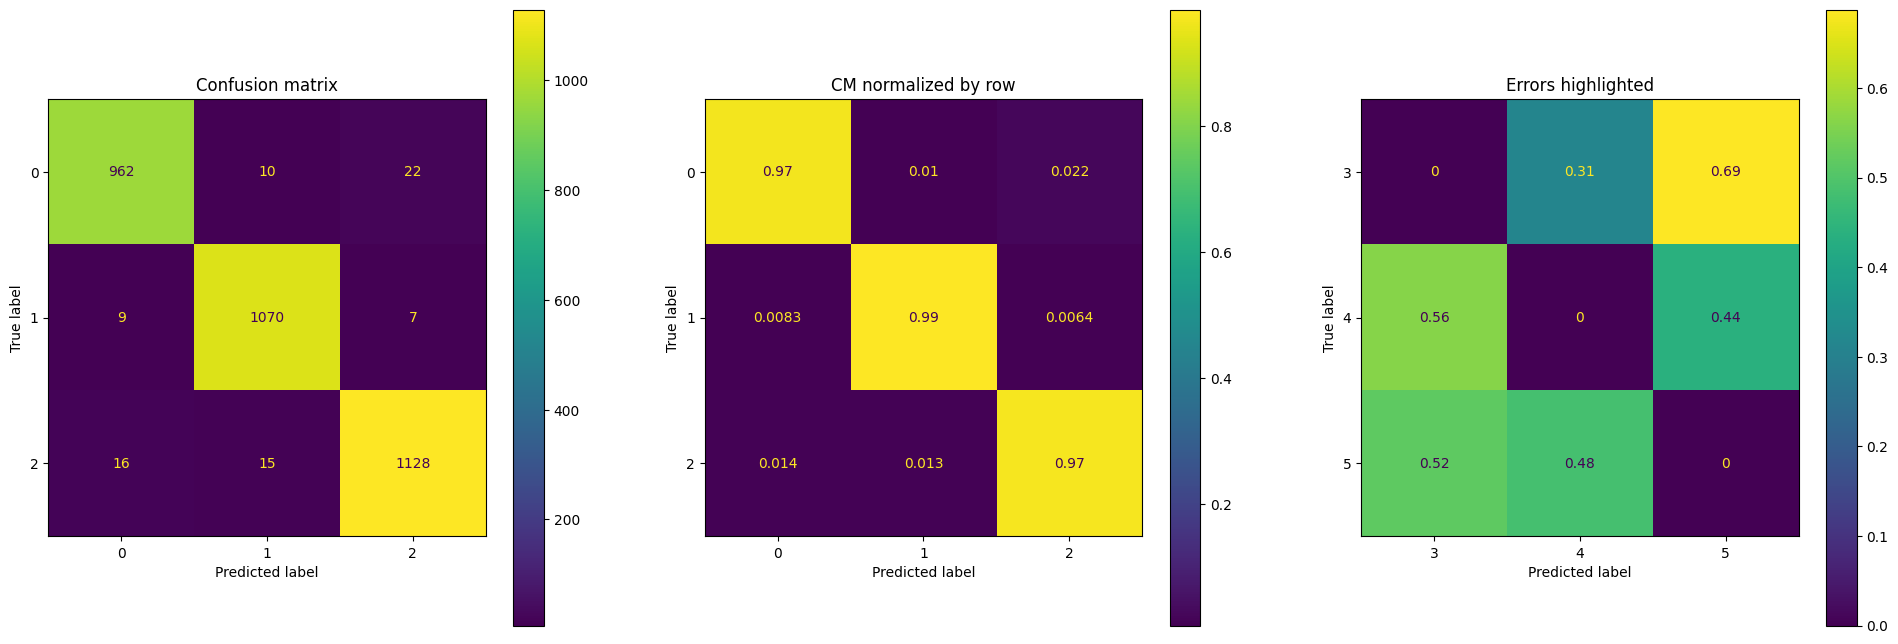

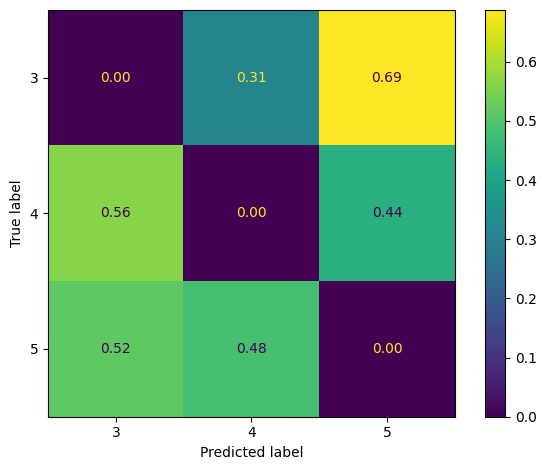

In [19]:
graficar_matrices_confusion(y_train, y_train_pred)



In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

calcular_metricas(y_train, y_train_pred)


Precisión macro: 0.9755916154352094
Recall macro: 0.9754422267261903
F1 Score macro: 0.9755070670896401
Precisión micro: 0.975609756097561
Recall micro: 0.975609756097561
F1 Score micro: 0.975609756097561
Precisión weighted: 0.9756029777220996
Recall weighted: 0.975609756097561
F1 Score weighted: 0.97559678319645


In [21]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           3       0.97      0.97      0.97       994
           4       0.98      0.99      0.98      1086
           5       0.97      0.97      0.97      1159

    accuracy                           0.98      3239
   macro avg       0.98      0.98      0.98      3239
weighted avg       0.98      0.98      0.98      3239



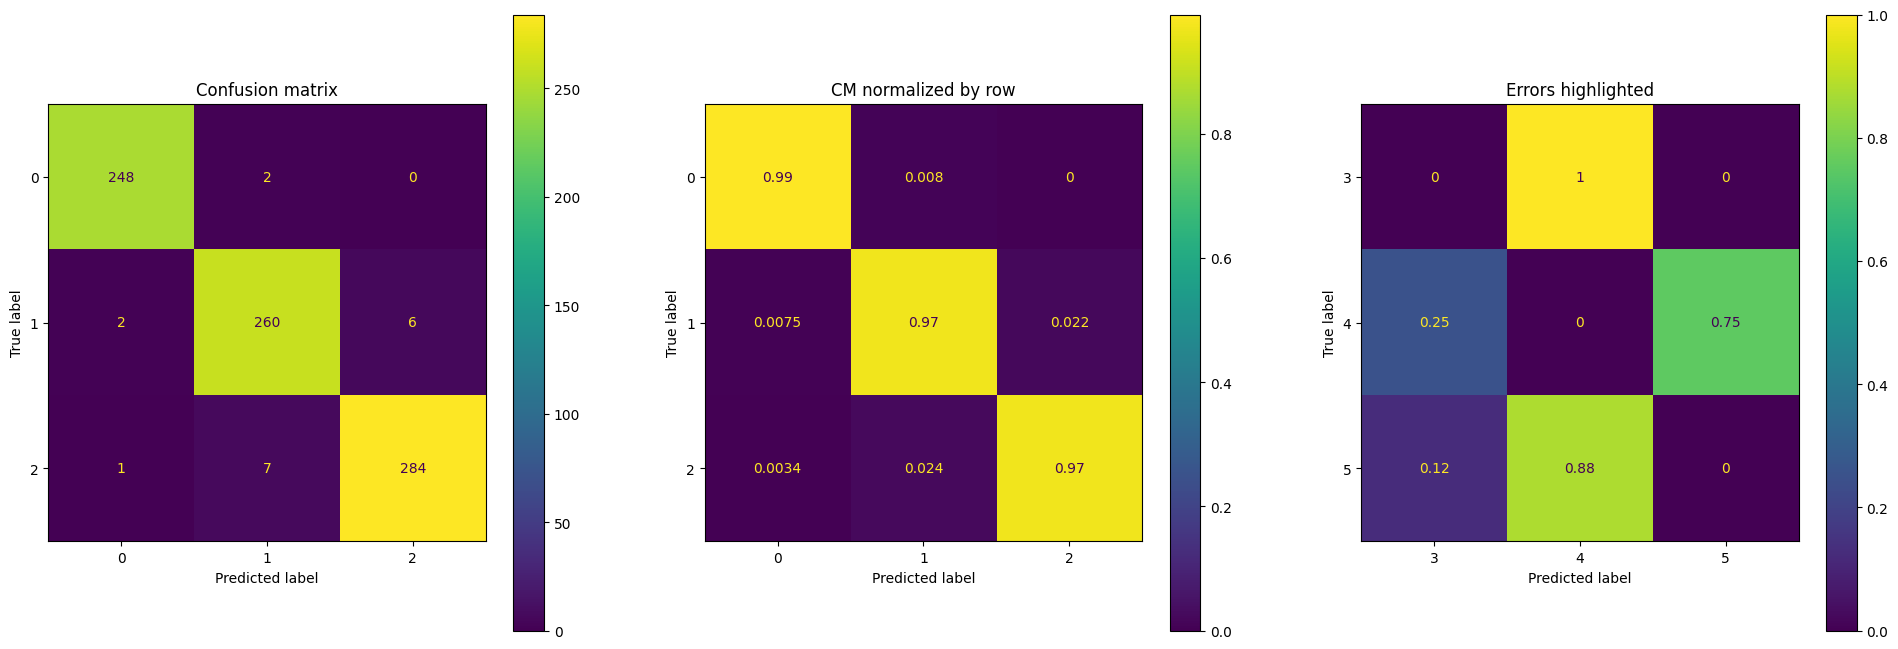

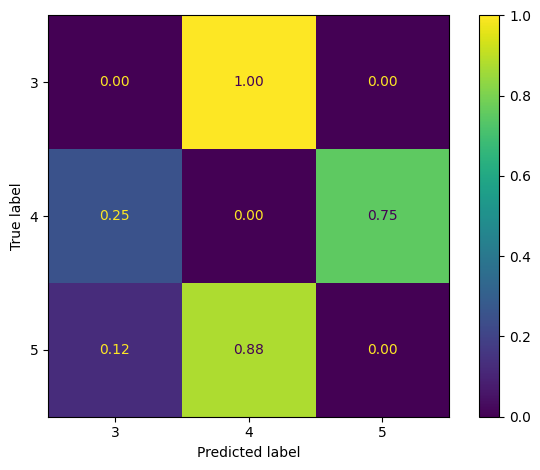

In [22]:
y_test_pred = pipeline.predict(x_test)

graficar_matrices_confusion(y_test, y_test_pred)

In [23]:
calcular_metricas(y_test, y_test_pred)

Precisión macro: 0.9779669681739648
Recall macro: 0.9782506644857901
F1 Score macro: 0.978102540527423
Precisión micro: 0.9777777777777777
Recall micro: 0.9777777777777777
F1 Score micro: 0.9777777777777777
Precisión weighted: 0.9777827532468653
Recall weighted: 0.9777777777777777
F1 Score weighted: 0.9777737823641754


In [24]:
print(classification_report(y_test, y_test_pred))   

              precision    recall  f1-score   support

           3       0.99      0.99      0.99       250
           4       0.97      0.97      0.97       268
           5       0.98      0.97      0.98       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



### Análisis de palabras identificadas

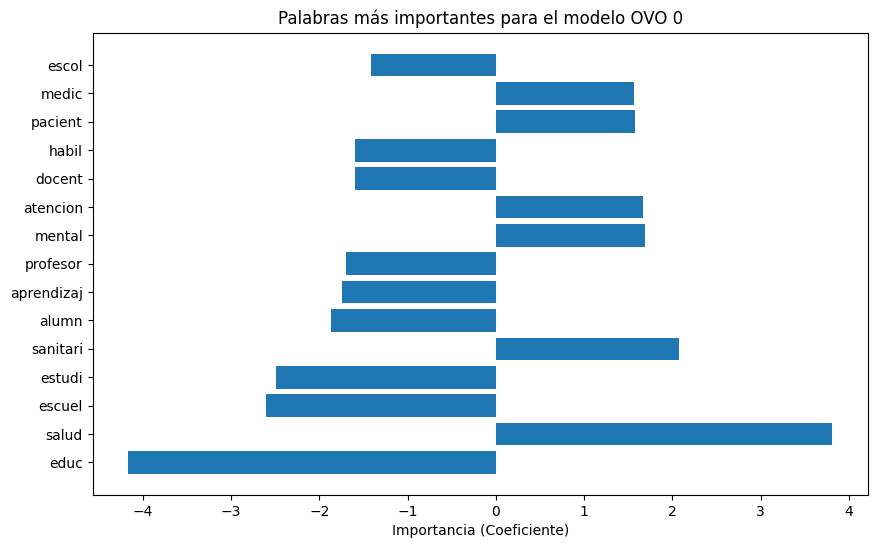

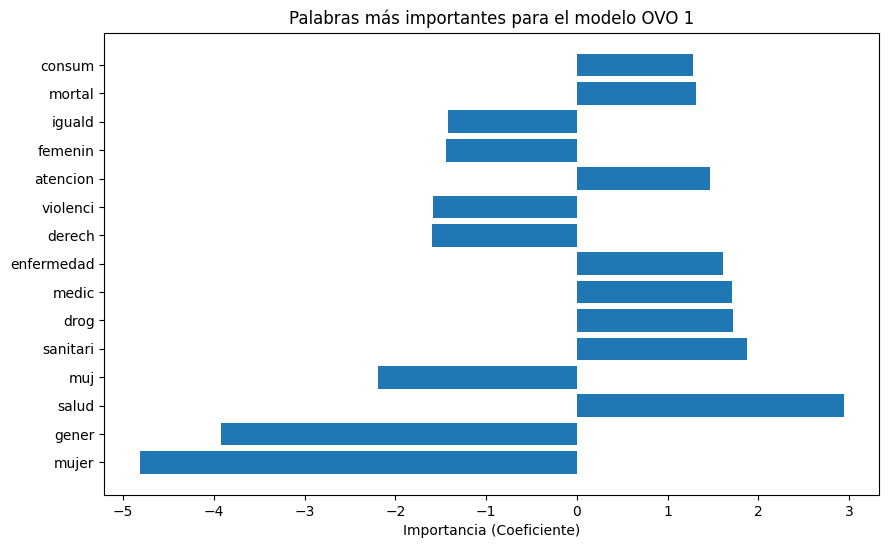

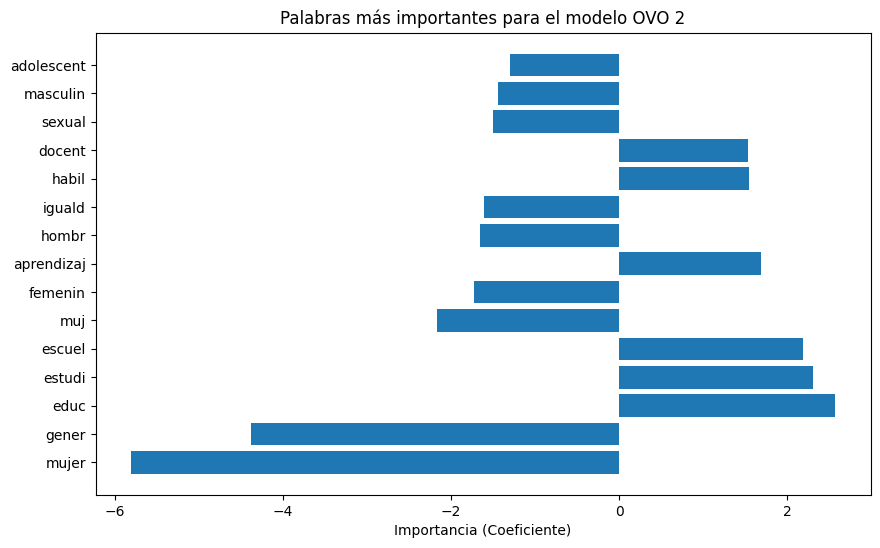

In [25]:
# Después de entrenar el pipeline
model = pipeline.named_steps['svm']

# Obtener los coeficientes del modelo lineal
coefficients = model.coef_.toarray()

feature_names = pipeline.named_steps['preprocessor'].named_transformers_['tfidf'].get_feature_names_out()

def plot_top_words_per_class(coefs, class_index, feature_names, top_n=10):
    importance = zip(feature_names, coefs[class_index])
    sorted_importance = sorted(importance, key=lambda x: abs(x[1]), reverse=True)  # Ordenar por valor absoluto
    
    # Seleccionar las top_n palabras más importantes
    top_words = sorted_importance[:top_n]
    
    words, coef = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, coef)
    plt.xlabel("Importancia (Coeficiente)")
    plt.title(f"Palabras más importantes para el modelo OVO {class_index}")
    plt.show()
    
    return top_words

# Graficar para cada clase
top_words_classes = []
for class_index in range(coefficients.shape[0]):
    top_words_classes.append(plot_top_words_per_class(coefficients, class_index, feature_names, top_n=15))


####### Imporatnte leer el markdown de abajo para poder entender mejor los coeficientes en cada una de las gráficas ########

**Importante**:
Como resultado de aplicar SVC para entrenar el modelo, el cual es un clasificador **binario**, para poder ser utilizado en tareas de multiclasificación se entrena un modelo SVC por cada par de clases. En este caso los modelos entrenados son los siguientes. Uno entre la clase 3 y 4, otro entre la clase 3 y 5 y un último entre la clase 4 y 5. Por ende, los coeficientes se interpretan de la siguiente manera:
1. Primera gráfica entre el clasificador OVO  tomando la clase 3 como positiva y la 4 como negativa. En síntesis, coeficientes positivos favorecen al ODS 3 y negativos al ODS 4.
2. Segunda gráfica entre el clasificador OVO tomando la clase 3 y la clase 5 como negativa. En síntesis, coeficientes pósitivos favorecen al ODS 3 y negativos al ODS 5.
3. Tercera gráfica entre el clasificador OVO tomando la clase 4 como positiva y la 5 como negativa. En síntesis, coeficientes positivos favorecen al ODS 4 y negativos al ODS 5.

### Prediccion datos no etiquetados modelo

In [27]:
df_2 = pd.read_csv(file2, encoding='UTF-8')
df_prediccion = df_2.copy()
df_prediccion["Textos_espanol"] = df_prediccion["Textos_espanol"].apply(corregir_tildes_texto)
df_prediccion['Textos_espanol'] = df_prediccion['Textos_espanol'].apply(clean_text)
df_prediccion.head(1)

,Textos_espanol,sdg
0,examin contribucion univers institu educ terciari desarroll capital human competent transferent tecnologa innov empresarial desarroll social cultural medioambiental creacion capac regional proces revision facilit creacion asoci ciudad region reun institu educ terciari organ public priv identific objet estrateg trabaj junt alcanz complement revision llev cab region transfronteriz mexicoest unid gran import estrateg econom nuev leon region pas nort mas recient sur arizon junt sonor,NaN


In [39]:
df_2["sdg"] = pipeline.predict(df_prediccion)
df_2.to_csv('particion_prueba_estudiantes.csv', index=False)
#print(df_2["sdg"])


## Modelo 3 DecisionTreeClassifier (Carlos Casadiego)

### Construcción modelo

In [29]:
dfp = df.copy()
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(df1['Textos_espanol'])
tf_idf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf["sdg"] = df1["sdg"]

# for feature in vectorizer.get_feature_names_out():
#     print(feature)

#dfp.isna().sum()
#tf_idf.isna().sum()


In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df, df['sdg'], test_size=0.2, random_state=42)
X_data = tf_idf.drop(columns=["sdg"])
Y_data = tf_idf["sdg"]

### Evaluación modelo

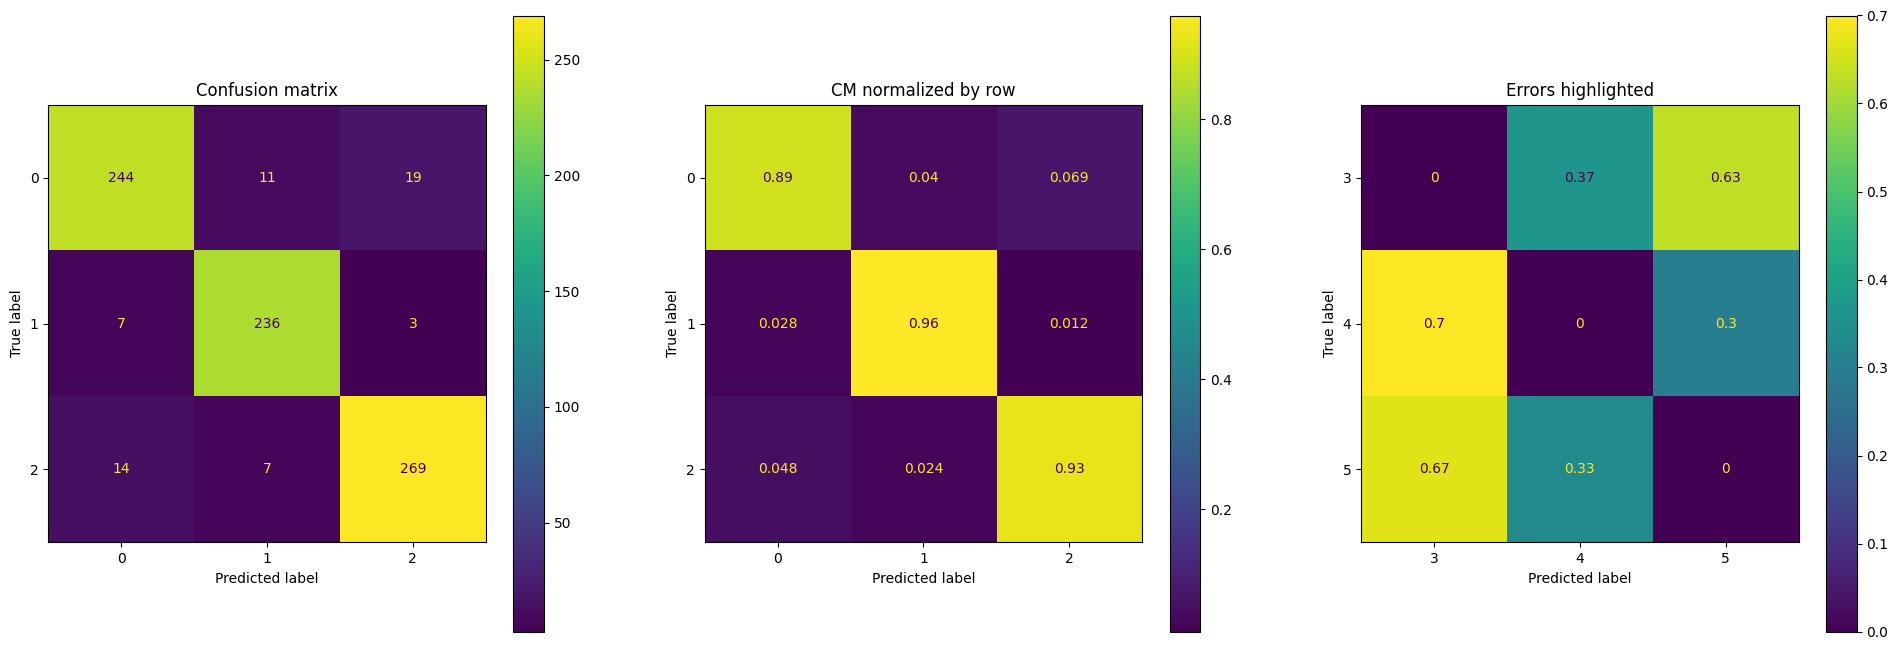

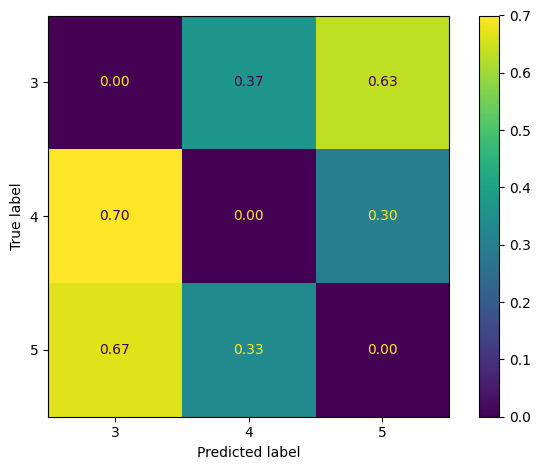

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Dividir datos en entrenamiento (80%) y test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = 0.8, random_state=1234, shuffle=True)

# Crear el objeto de arbol de decisión utilizando como criterio de pureza la entropía
arbol = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Entrenar el modelo con los datos de entrenamiento
arbol = arbol.fit(X_train, Y_train)

# Determinar las predicciones del modelo sobre el conjunto de prueba
Y_pred = arbol.predict(X_test)


graficar_matrices_confusion(Y_test, Y_pred)



In [32]:
calcular_metricas(Y_test, Y_pred)


Precisión macro: 0.924762400226134
Recall macro: 0.9258155830991988
F1 Score macro: 0.9251233356431291
Precisión micro: 0.9246913580246914
Recall micro: 0.9246913580246914
F1 Score micro: 0.9246913580246914
Precisión weighted: 0.9246041024213074
Recall weighted: 0.9246913580246914
F1 Score weighted: 0.9244879218102398


In [33]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           3       0.92      0.89      0.91       274
           4       0.93      0.96      0.94       246
           5       0.92      0.93      0.93       290

    accuracy                           0.92       810
   macro avg       0.92      0.93      0.93       810
weighted avg       0.92      0.92      0.92       810



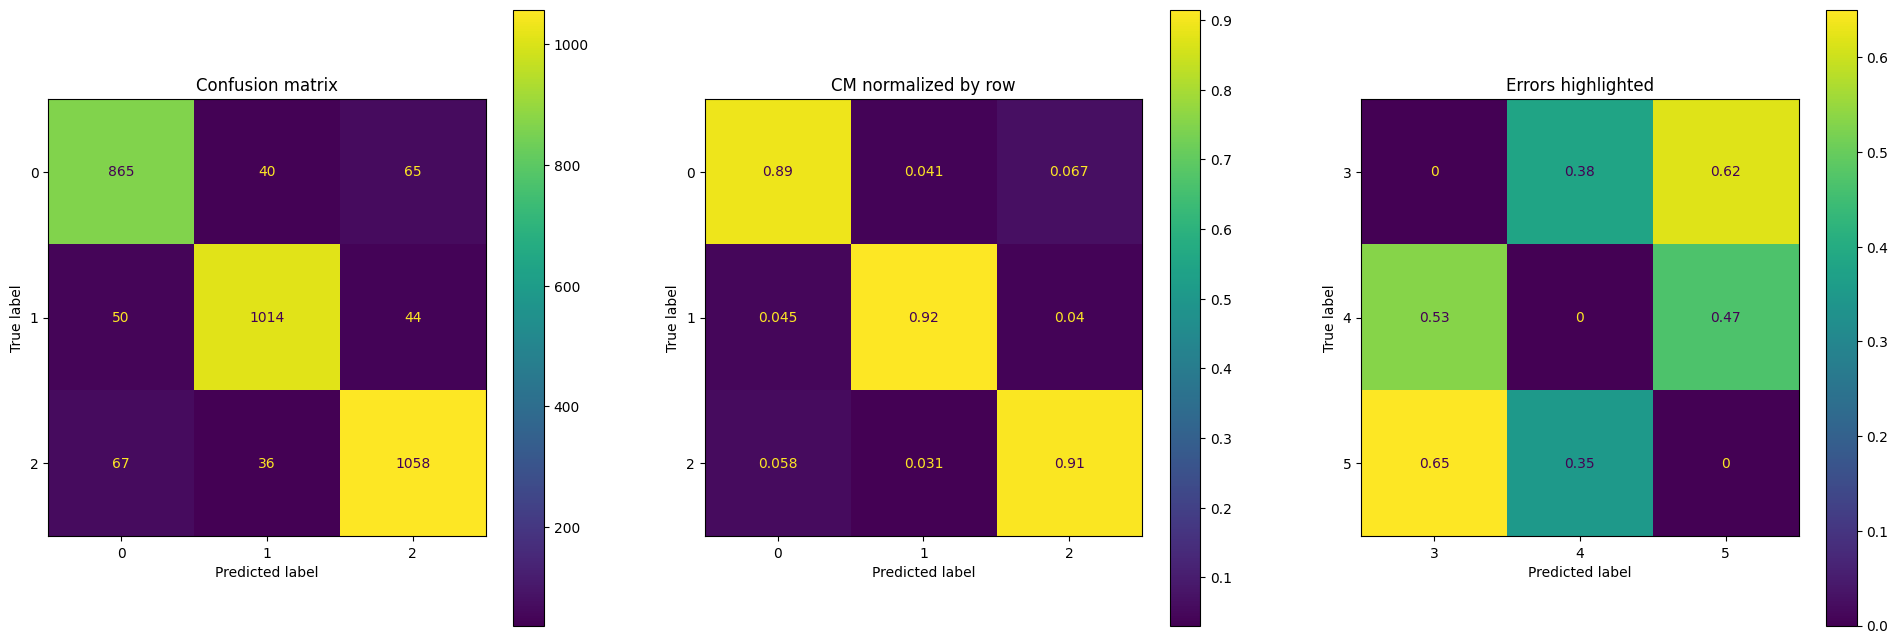

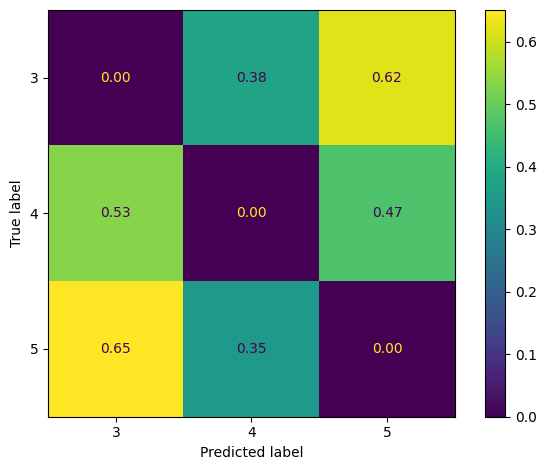

In [34]:
y_train_pred = cross_val_predict(arbol, X_train, Y_train, cv=5)

graficar_matrices_confusion(Y_train, y_train_pred)



In [35]:
calcular_metricas(Y_train, y_train_pred)


Precisión macro: 0.9059095804436034
Recall macro: 0.9060661361976298
F1 Score macro: 0.9059540535268601
Precisión micro: 0.9067613460944736
Recall micro: 0.9067613460944736
F1 Score micro: 0.9067613460944736
Precisión weighted: 0.9069882990656716
Recall weighted: 0.9067613460944736
F1 Score weighted: 0.9068414589605837


In [36]:
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           3       0.88      0.89      0.89       970
           4       0.93      0.92      0.92      1108
           5       0.91      0.91      0.91      1161

    accuracy                           0.91      3239
   macro avg       0.91      0.91      0.91      3239
weighted avg       0.91      0.91      0.91      3239

